# First pass analysis of line/loop data

<ul>
    <li> Analyse correct sequence lengths. </li>
    <li> Do reaction times </li>
    <li> Analyse as a function of distance from reward </li>
    <li> Try to fit RL model to these data </li> 
    
</ul>

<b> WHY IS THERE A DIFFERENCE BETWEEN REW_LIST AND DAT_DICT['STATE'] </b>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import networkx as nx
clrs = seaborn.color_palette()

sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")


sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master")
sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master\packages")


In [2]:
import mouse_poker as mpk

# Defined functions 

In [3]:
poke_pos = [ [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [124]:
def get_poke_to_state_map(lines):
    """ """
    tmp = []
    for i,j in zip([int(re.findall('POKEDPORT_([0-9])',i)[0]) for i in lines if '_POKEDPORT' in i],
                         [int(re.findall('POKEDSTATE_([0-9])',i)[0]) for i in lines if '_POKEDSTATE' in i]):

        if [i,j] not in tmp:
            tmp.append([i,j])
    poke_to_state_map = [i[1] for i in sorted(tmp)]
    return poke_to_state_map,tmp

In [125]:
def get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=5,maxNrew=100,verbose=False):
    
    """ Checked the reward locations """
    #aa = [int(re.findall('POKEDSTATE_([0-9])',lines[ijk-1])[0]) for ijk,i in enumerate(lines) if 'REW_True' in i]
    perf = np.zeros([9,4])
    perf_ctr = np.zeros([9,4])
    rew_hist = []
    for i,j in enumerate([poke_to_state_map[i] for i in rew_indices]):
        perf[j,i] = np.nan
    for rew_ctr,(st,nd) in enumerate(zip(np.where(dat_dict['rew_list'])[0][:-1]+1,np.where(dat_dict['rew_list'])[0][1:])):
        #print(st,nd)
        #rew_loc = poke_to_state_map[dat_dict['rews'][rew_ctr][0]]
        #c_rew_index = rew_indices.index(dat_dict['rews'][rew_ctr][0])
        rew_loc = dat_dict['state'][nd][0]
        #print(dat_dict['port'][nd][0])
        rew_loc = dat_dict['state'][nd][0]

        c_rew_index = rew_indices.index(dat_dict['port'][nd][0])
        
        if not rew_hist:
            rew_hist.append(rew_loc)
        elif rew_loc==rew_hist[-1]:
            rew_hist.append(rew_loc)
        else:
            rew_hist = []
        

        if np.logical_and(len(rew_hist)>=minNrew,len(rew_hist)<=maxNrew): 
            #print(seq_rews)
            has_visited = []
            #print(st,nd)
            #print('NEXTREW!!!!!!!!!')
            for pk_ctr in range(st,nd):
                if (len(dat_dict['state'][pk_ctr][1])>1) or (dat_dict['state'][pk_ctr][0]==0 or dat_dict['state'][pk_ctr][0]==8):
                    d0 = np.abs(dat_dict['state'][pk_ctr][0]-rew_loc)
                    d1 = np.abs(dat_dict['state'][pk_ctr+1][0]-rew_loc)
                    st_dist = dat_dict['state'][pk_ctr][0]-dat_dict['state'][pk_ctr+1][0]
                    if dat_dict['rew_list'][pk_ctr]:
                        st_dist = 99
                    
                    state = dat_dict['state'][pk_ctr][0]
                    #print(state,dat_dict['state'][pk_ctr+1][0],rew_loc)
                    if state not in has_visited:
                        rewarded = dat_dict['rew_list'][pk_ctr]
                        if rewarded:
                            perf[state,c_rew_index] += 1
                            perf_ctr[state,c_rew_index] += 1

                        elif d1<d0:
                            perf[state,c_rew_index] += 1
                            perf_ctr[state,c_rew_index] += 1
                        else:
                            perf[state,c_rew_index] += 0
                            perf_ctr[state,c_rew_index] += 1
                else:
                    print("GUIDED")
                        
    return perf,perf_ctr

In [126]:
poke_to_state_map

[5, 2, 8, 3, 6, 7, 4, 0, 1]

In [127]:
#aa = [int(re.findall('POKEDSTATE_([0-9])',lines[ijk-1])[0]) for ijk,i in enumerate(lines) if 'REW_True' in i]

In [128]:
#poke_to_state_map

# Actual code to run stuff 

In [206]:
#print(day_df['filepath'].values[ix])
f = open("/Users/yweissenberger/Documents/Pycontrol/data/line_loop_batch_4_RUNNAVI/'456675_3'-2021-03-15-120439.txt",'r')
#f = open("/Users/yweissenberger/Documents/Pycontrol/data/line_loop_batch_4_RUNNAVI/'456675_3'-2021-03-03-105842.txt",'r')
#f = open("/Users/yweissenberger/Documents/Pycontrol/data/line_loop_batch_4_RUNNAVI/'456675_3'-2021-03-05-142010.txt",'r')  #test session

#f = open("/Volumes/hpc_dat/pycontrol/data/line_loop_batch_4_RUNNAVI/'456675_3'-2021-02-12-121633.txt",'r')
#f = open("/Users/yves/Documents/beh_dat_new_room/'456675_10'-2021-02-17-110616.txt",'r')

lines =f.readlines()
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)
print(nRews)

73


In [207]:
task_nr

'1'

In [208]:

poke_to_state_map,_ = get_poke_to_state_map(lines)
rew_indices = [0,3,5,8]
rew_indices = [eval(re.findall('REWARD LOCATIONS(\[.*\])',l)[0]) for l in lines if re.findall('REWARD LOCATIONS(\[.*\])',l)][0]


In [209]:
poke_to_state_map

[5, 2, 8, 3, 6, 7, 4, 0, 1]

In [210]:
poke_to_state_map

[5, 2, 8, 3, 6, 7, 4, 0, 1]

In [211]:
nR = 0
perf,perf_ctr = get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=nR)


GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED


In [205]:
fc

array([[1. , 1. , 1. , 1. ],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, 1. , nan, nan],
       [nan, 1. , nan, nan],
       [1. , 1. , nan, nan],
       [0.5, 1. , nan, nan],
       [1. , 1. , 1. , 1. ]])

In [194]:
np.nansum(perf)/np.nansum(perf_ctr)

0.6127320954907162

In [195]:
np.nanmean(perf/perf_ctr)

<ipython-input-195-b1b594a67bfa>:1: RuntimeWarning: invalid value encountered in true_divide
  np.nanmean(perf/perf_ctr)


0.733766839448926

In [212]:
#perf,perf_ctr = get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=nR,maxNrew=nR)
fc = perf/perf_ctr


<ipython-input-212-01bd59f8f7ad>:2: RuntimeWarning: invalid value encountered in true_divide
  fc = perf/perf_ctr


In [197]:
allres = []
for nR in range(0,20):
    print(nR)
    perf,perf_ctr = get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=nR,maxNrew=nR)
    fc = perf/perf_ctr
    allres.append(np.nansum(perf/np.nansum(perf_ctr)))
#fc[np.isnan(fc)] = 1
print(np.nanmean(fc))

0
GUIDED
GUIDED
GUIDED
1
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
2
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
3
GUIDED
GUIDED
4
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
5
6
7
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
GUIDED
8
9
10
11
GUIDED
12
13
14
GUIDED
GUIDED
GUIDED
GUIDED
15
GUIDED
GUIDED
GUIDED
GUIDED
16
17
18
19
0.9285714285714286


<ipython-input-197-782ed6cfdf64>:5: RuntimeWarning: invalid value encountered in true_divide
  fc = perf/perf_ctr


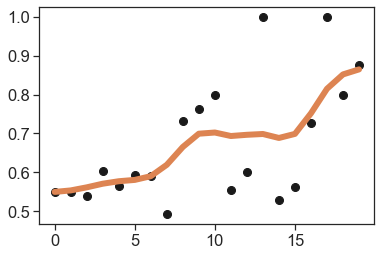

In [198]:
from scipy.ndimage import gaussian_filter1d
plt.plot(gaussian_filter1d(allres,1.5,mode='nearest'),color=clrs[1],linewidth=6)
plt.scatter(range(len(allres)),allres,s=64,color='k')

In [199]:
#perf[np.where(perf_ctr==0)[0],np.where(perf_ctr==0)[1],np.where(perf_ctr==0)[2]] = np.nan

In [200]:
#plt.plot(gaussian_filter1d(np.nanmean(perf/perf_ctr,axis=(0,1)),2,mode='nearest'))

In [213]:
edges_state = [[i,i+1] for i in range(8)]
edges_state.extend([i+1,i] for i in range(8))    
edges = []
for e1,e2 in edges_state:
    edges.append([poke_to_state_map.index(e1),poke_to_state_map.index(e2)])

In [214]:
ix = 1
c_rew_index = poke_to_state_map[rew_indices[ix]]

good_edges = [[poke_to_state_map.index(0),poke_to_state_map.index(1)],
              [poke_to_state_map.index(8),poke_to_state_map.index(7)]]
bad_edges = []
for s in range(1,8):
    if s!=c_rew_index:
        d1 = np.abs(c_rew_index-(s+1))
        d2 = np.abs(c_rew_index-(s-1))
        min_ = np.argmin([d1,d2])
        max_ = np.argmax([d1,d2])

        good_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][min_])])
        bad_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][max_])])

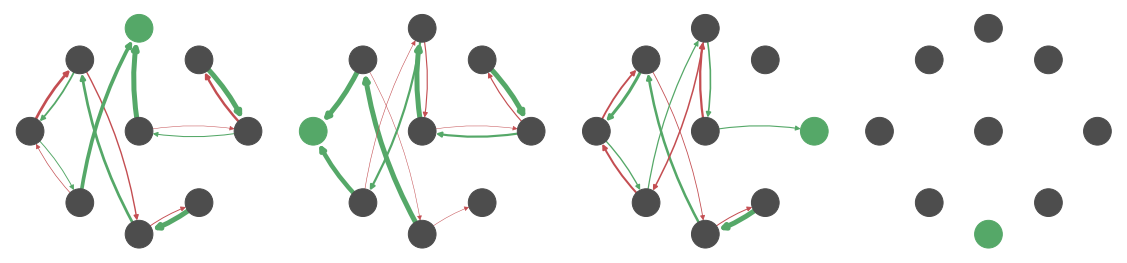

In [215]:
plt.figure(figsize=(16,4))
for ix in range(4):
    plt.subplot(1,4,ix+1)
    #ix = 1
    c_rew_index = poke_to_state_map[rew_indices[ix]]

    good_edges = [[poke_to_state_map.index(0),poke_to_state_map.index(1)],
                  [poke_to_state_map.index(8),poke_to_state_map.index(7)]]
    bad_edges = []
    for s in range(1,8):
        if s!=c_rew_index:
            d1 = np.abs(c_rew_index-(s+1))
            d2 = np.abs(c_rew_index-(s-1))
            min_ = np.argmin([d1,d2])
            max_ = np.argmax([d1,d2])

            good_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][min_])])
            bad_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][max_])])




    pos = np.array([1,-1])*poke_pos
    G0 = nx.DiGraph()
    G0.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos)
    nx.draw(G0,pos=pos,alpha=.2)
    G = nx.DiGraph()
    weights = []

    for e in good_edges:
        G.add_edge(e[0],e[1],weight=fc[poke_to_state_map[e[0]],ix],color='g')
        #weights.append(3*fc[poke_to_state_map[e[0]],ix])

    for e in bad_edges:
        G.add_edge(e[0],e[1],weight=1-fc[poke_to_state_map[e[0]],ix],color='r')
        #weights.append(3*fc[poke_to_state_map[e[0]],ix])

    #G.add_edges_from([i for i in good_edges if None not in i])
    weights = nx.get_edge_attributes(G,'weight')
    colors = nx.get_edge_attributes(G,'color')
    node_colors = ['.3' for _ in range(9)]
    node_colors[[7,5,3,1][ix]] = 'g'
    nx.draw(G,
        pos=pos,
            width=(10**(np.array(list(weights.values()))))/2,
            edge_color=np.array(list(colors.values())),
            connectionstyle="arc3,rad=-0.1",
            node_color=node_colors,
            node_size=768)
plt.tight_layout()
#plt.savefig("/Users/yves/Desktop/tpf/navi_decisions.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_decisions.png",dpi=300)


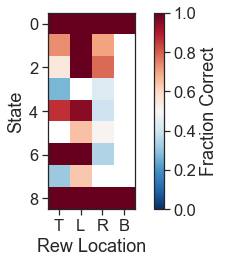

In [216]:
sqr = fc
sqr[0] = 1
sqr[-1] = 1
plt.imshow(sqr,vmin=0,vmax=1,cmap='RdBu_r')
plt.xlabel("Rew Location")
plt.xticks([0,1,2,3],['T','L','R','B'])
plt.ylabel("State")
cbar = plt.colorbar()
cbar.set_label("Fraction Correct")
plt.tight_layout()

In [79]:
fc = perf/perf_ctr
fc[np.isnan(fc)] = 1

<ipython-input-79-52fb409a140d>:1: RuntimeWarning: invalid value encountered in true_divide
  fc = perf/perf_ctr


In [80]:
fc

array([[1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 0.75],
       [1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  ]])

# Performance history

In [81]:
ROOT = "/Users/yweissenberger/Documents/Pycontrol/data/line_loop_batch_4_RUNNAVI/"#/Users/yves/Documents/behavior_data/line_loop_cohort_1/line_loop_batch_4_RUNNAVI/'
fs = sorted([os.path.join(ROOT,i) for i in os.listdir(ROOT) if '.txt' in i])
perf_hist = []
all_fc  = []
all_perf = np.zeros([9,4])
all_ctr = np.zeros([9,4])
for f_ in fs[:-1]:
    try:
        f = open(f_,'r')
        lines =f.readlines()
        experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
        dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)

        #poke_to_state_map = get_poke_to_state_map(lines)
        rew_indices = [0,3,5,8]
        perf,perf_ctr = get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=20)

        fc = perf/perf_ctr
        all_perf += perf
        all_ctr += perf_ctr
        all_fc.append(fc)
        perf_hist.append(np.nanmean(fc))
    except:
        pass

NEXTREW!!!!!!!!!
7 6 3 1
6 5 3 1
5 4 3 1
4 5 3 1
5 4 3 1
4 5 3 1
5 4 3 1
4 5 3 1
5 4 3 1
4 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
6 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
7 6 3 1
6 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
5 4 3 1
4 5 3 1
5 6 3 1
6 5 3 1
5 6 3 1
6 7 3 1
7 6 3 1
6 5 3 1
5 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
6 5 3 1
5 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
7 8 3 1
8 7 3 1
7 8 3 1
8 7 3 1
7 8 3 1
8 7 3 1
7 8 3 1
8 7 3 1
7 6 3 1
6 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
4 5 3 1
5 6 3 1
6 7 3 1
7 6 3 1
6 5 3 1
5 6 3 1
6 7 3 1
7 8 3 1
8 7 3 1
7 8 3 1
8 7 3 1
7 6 3 1
6 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
6 5 3 1
5 6 3 1
6 5 3 1
5 4 3

<ipython-input-81-7fd4eac7e435>:18: RuntimeWarning: invalid value encountered in true_divide
  fc = perf/perf_ctr


NEXTREW!!!!!!!!!
8 7 3 1
7 6 3 1
6 5 3 1
5 4 3 1
4 3 3 1
3 4 3 1
4 5 3 1
5 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
3 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
7 8 3 1
8 7 3 1
7 8 3 1
8 7 3 1
7 6 3 1
6 5 3 1
5 4 3 1
4 3 3 1
3 4 3 1
4 5 3 1
5 4 3 1
4 5 3 1
5 6 3 1
6 7 3 1
7 6 3 1
6 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
4 5 3 1
5 6 3 1
6 5 3 1
5 4 3 1
4 5 3 1
5 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
1 2 2 7
2 3 2 7
3 4 2 7
4 5 2 7
5 4 2 7
4 3 2 7
3 2 2 7
2 1 2 7
1 2 2 7
2 1 2 7
1 2 2 7
2 3 2 7
3 4 2 7
4 5 2 7
5 6 2 7
6 7 2 7
NEXTREW!!!!!!!!!
0 1 2 7
1 0 2 7
0 1 2 7
1 2 2 7
2 3 2 7
3 4 2 7
4 5 2 7
5 4 2 7
4 3 2 7
3 4 2 7
4 5 2 7
5 4 2 7
4 5 2 7
5 4 2 7
4 5 2 7
5 6 2 7
6 5 2 7
5 6 2 7
6 7 2 7
NEXTREW!!!!!!!!!
1 2 2 7
2 3 2 7
3 2 2 7
2 3 2 7
3 4 2 7
4 5 2 7
5 6 2 7
6 7 2 7
NEXTREW!!!!!!!!!
2 3 2 7
3 4 2 7
4 5 2 7
5 6 2 7
6 7 2 7
NEXTREW!!!!!!!!!
4 3 2 7
3 4 2 7

NEXTREW!!!!!!!!!
6 5 3 1
5 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
3 4 2 7
4 5 2 7
5 6 2 7
6 7 2 7
NEXTREW!!!!!!!!!
6 7 2 7
NEXTREW!!!!!!!!!
1 2 2 7
2 3 2 7
3 4 2 7
4 5 2 7
5 4 2 7
4 3 2 7
3 2 2 7
2 1 2 7
1 2 2 7
2 3 2 7
3 4 2 7
4 3 2 7
3 2 2 7
2 3 2 7
3 4 2 7
4 5 2 7
5 6 2 7
6 7 2 7
NEXTREW!!!!!!!!!
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
4 3 1 3
NEXTREW!!!!!!!!!
4 3 1 3
NEXTREW!!!!!!!!!
4 3 1 3
NEXTREW!!!!!!!!!
2 3 1 3
NEXTREW!!!!!!!!!
6 7 0 5
7 6 0 5
6 5 0 5
NEXTREW!!!!!!!!!
4 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
7 6 1 3
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
7 6 1 3
6 5 1 3
5 4 1 3
4 5 1 3
5 6 1 3
6 7 1 3
7 6 1 3
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
7 6 1 3
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
6 7 1 3
7 6 1 3
6 7 1 3
7 6 1 3
6 5 1 3
5 6 1 3
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
2 3 1 3
NEXTREW!!!!!!!!!
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
6 5 1 3
5 6 1 3
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
5 4 1 3
4 3 1 3
NEXTREW!!!!!

<ipython-input-81-7fd4eac7e435>:22: RuntimeWarning: Mean of empty slice
  perf_hist.append(np.nanmean(fc))


NEXTREW!!!!!!!!!
1 2 1 3
2 3 1 3
NEXTREW!!!!!!!!!
1 2 1 3
2 3 1 3
NEXTREW!!!!!!!!!
6 5 1 3
5 6 1 3
6 5 1 3
5 4 1 3
4 3 1 3
NEXTREW!!!!!!!!!
6 5 2 7
5 4 2 7
4 3 2 7
3 2 2 7
2 3 2 7
3 4 2 7
4 5 2 7
5 4 2 7
4 5 2 7
5 6 2 7
6 7 2 7
NEXTREW!!!!!!!!!
4 3 3 1
3 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
4 3 3 1
3 4 3 1
4 3 3 1
3 4 3 1
4 3 3 1
3 2 3 1
2 1 3 1
NEXTREW!!!!!!!!!
7 8 0 5
8 7 0 5
7 8 0 5
8 7 0 5
7 8 0 5
8 7 0 5
7 6 0 5
6 5 0 5
NEXTREW!!!!!!!!!
6 5 0 5
NEXTREW!!!!!!!!!
4 3 0 5
3 2 0 5
2 1 0 5
1 2 0 5
2 3 0 5
3 2 0 5
2 1 0 5
1 0 0 5
0 1 0 5
1 2 0 5
2 3 0 5
3 4 0 5
4 5 0 5
NEXTREW!!!!!!!!!
7 6 0 5
6 5 0 5
NEXTREW!!!!!!!!!
2 3 0 5
3 2 0 5
2 1 0 5
1 2 0 5
2 3 0 5
3 2 0 5
2 3 0 5
3 2 0 5
2 3 0 5
3 2 0 5
2 1 0 5
1 0 0 5
0 1 0 5
1 2 0 5
2 3 0 5
3 4 0 5
4 5 0 5
NEXTREW!!!!!!!!!
2 3 0 5
3 2 0 5
2 3 0 5
3 2 0 5
2 1 0 5
1 0 0 5
0 1 0 5
1 2 0 5
2 1 0 5
1 2 0 5
2 3 0 5
3 4 0 5
4 5 0 5
NEXTREW!!!!!!!!!
2 3 2 7
3 2 2 7
2 1 2 7
1 0 2 7
0 1 2 7
1 2 2 7
2 3 2 7
3 2 2 7
2 1 2 7
1 0 2 7
0 1 2 7
1 2

In [82]:
all_perf/all_ctr

<ipython-input-82-b6312f3beb51>:1: RuntimeWarning: invalid value encountered in true_divide
  all_perf/all_ctr


array([[1.        , 1.        , 1.        ,        nan],
       [0.85714286, 0.95833333, 0.51612903,        nan],
       [0.87735849, 0.95      , 0.7260274 , 0.93203883],
       [0.49541284,        nan, 0.5625    , 0.7398374 ],
       [0.96610169, 0.87628866, 0.73076923, 0.78625954],
       [       nan, 0.75728155, 0.71794872, 0.86813187],
       [0.91304348, 0.85057471, 0.78125   , 0.83050847],
       [0.78947368, 0.92857143,        nan, 0.74358974],
       [1.        , 1.        ,        nan, 1.        ]])

In [83]:
stt.binom_test(0.57*400,n=400)

0.00796983057579857

In [84]:
fc

array([[1.        ,        nan, 1.        ,        nan],
       [0.66666667, 1.        , 0.35294118,        nan],
       [0.625     , 1.        , 0.75      , 1.        ],
       [0.27272727,        nan, 0.42857143, 0.4       ],
       [0.75      , 1.        , 0.83333333, 1.        ],
       [       nan, 0.4       , 0.6875    ,        nan],
       [1.        , 1.        , 0.5       ,        nan],
       [0.4       , 0.5       ,        nan,        nan],
       [1.        , 1.        ,        nan,        nan]])

In [85]:
#np.nanmean(all_fc[-5:],axis=0)

[[1.         1.         1.         1.        ]
 [0.88888889 1.         0.67647059        nan]
 [0.87847222 1.         0.75       0.95588235]
 [0.59454545        nan 0.54761905 0.79786096]
 [0.91964286 0.94490132 0.81111111 0.89951923]
 [       nan 0.6971867  0.78472222 0.90277778]
 [0.875      0.90192308 0.83333333 0.93333333]
 [0.85       0.85227273        nan 1.        ]
 [1.         1.         1.         1.        ]]


<ipython-input-86-81c2fe02d6ba>:2: RuntimeWarning: Mean of empty slice
  sqr = np.nanmean(all_fc[-10:],axis=0)


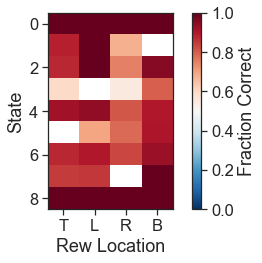

In [86]:
#sqr = all_perf/all_ctr
sqr = np.nanmean(all_fc[-10:],axis=0)
fc = sqr
sqr[0] = 1
sqr[-1] = 1
plt.imshow(sqr,vmin=0,vmax=1,cmap='RdBu_r',aspect=.7)
plt.xlabel("Rew Location")
plt.xticks([0,1,2,3],['T','L','R','B'])
plt.ylabel("State")
cbar = plt.colorbar()
cbar.set_label("Fraction Correct")
#cbar.ax.
plt.tight_layout()
#plt.tight_layout*
#plt.savefig("/Users/yves/Desktop/tpf/navi_frac_corr_by_state.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_frac_corr_by_state.png",dpi=300)
print(sqr)

In [87]:
seaborn.set(font_scale=1.5,style='ticks',rc={'axes.edgecolor': 'k',
                                             'axes.linewidth': 2,
                                             #'xtick.major.size': 6,
                                             'axes.labelcolor':'k',
                                             'xtick.major.width': 2,
                                             'ytick.major.width': 2,
                                             'xtick.major.pad': 5.5,
                                             'ytick.major.pad': 5.5,
                                             'axes.labelsize': 18
                                            })


In [73]:
from scipy.ndimage import gaussian_filter1d

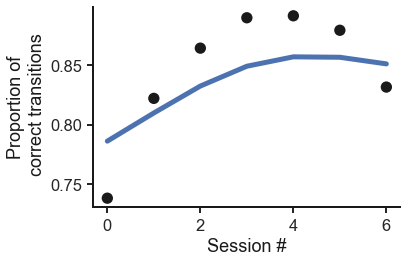

In [74]:
sess_perf = [np.nanmean(i) for i in perf_hist if not np.isnan(np.nanmean(i))][1:]
plt.plot(gaussian_filter1d(sess_perf,2.25,mode='nearest'),linewidth=5)
plt.scatter(range(len(sess_perf)),sess_perf,color='k',s=128,edgecolors='none')
plt.xlabel("Session #")
plt.ylabel("Proportion of\n correct transitions")
#plt.xlim(-.5)
seaborn.despine()
plt.tight_layout()
#plt.savefig("/Users/yves/Desktop/tpf/navi_learning.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_learning.png",dpi=300)


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


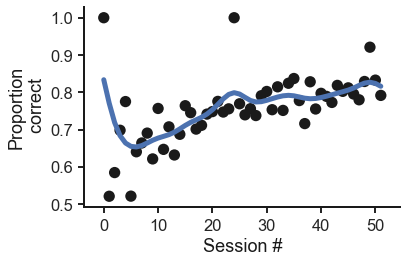

In [73]:
sess_perf = [np.nanmean(i) for i in perf_hist if not np.isnan(np.nanmean(i))][1:]
plt.plot(gaussian_filter1d(sess_perf,2.25,mode='nearest'),linewidth=5)
plt.scatter(range(len(sess_perf)),sess_perf,color='k',s=128,edgecolors='none')
plt.xlabel("Session #")
plt.ylabel("Proportion\n correct")
#plt.xlim(-.5)
seaborn.despine()
plt.tight_layout()

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


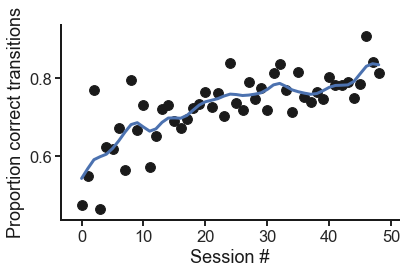

In [157]:
sess_perf = [np.nanmean(i) for i in perf_hist if not np.isnan(np.nanmean(i))][2:]
plt.plot(gaussian_filter1d(sess_perf,1.5),linewidth=3)
plt.scatter(range(len(sess_perf)),sess_perf,color='k',s=96)
plt.xlabel("Session #")
plt.ylabel("Proportion correct transitions")
seaborn.despine()
plt.tight_layout()

In [352]:
sess_perf

[0.49722222222222223,
 0.4375,
 0.575,
 0.7785714285714285,
 0.533253751851708,
 0.6662414947395835,
 0.6223282951941488,
 0.6737401169376257,
 0.5623015873015873,
 0.7999957558781088,
 0.6801653630532941,
 0.7255549534816176,
 0.6285714285714286,
 0.6530097125413526,
 0.7148889066754313,
 0.7511047675485337,
 0.6965651402837558,
 0.6748187242519604,
 0.7148784777376731,
 0.7550147542587059,
 0.737619565377113,
 0.7809430094711312,
 0.7239262720576801,
 0.7749516267766803,
 0.812864219114219,
 0.8291787702735416,
 0.7415101007090994,
 0.8239091239707511,
 0.8041840068465725,
 0.7300002479969016,
 0.8666666666666666,
 0.7148947762687461,
 0.8286583091222216,
 0.843745340022627,
 0.8108984078641084,
 0.7186338736621062,
 0.8182802374871762,
 0.768012650998762,
 0.8241828432867361,
 0.7641757529894638,
 0.7426986029797972,
 0.792046279791378,
 0.7794624634760058,
 0.7853650581919769,
 0.7923093533308587,
 0.8192483509256663,
 0.7656474722385459,
 0.9027777777777777,
 0.8608389450056116,
 